# ROI Segmentation/Detection in Thunder

      Data Gathered: 01.29.15           
      Analyzed: 12.19.15
      Gathered By: WALIII & DPL
      
Analysis of Calciuim imaging data from singing birds with the FreedomScope, from a bout containing several songs. Data was sampled at 30Hz

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import Colorize
image = Colorize.image

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%matplotlib inline

In [3]:
import os.path as pth
imagepath = pth.join(pth.dirname(pth.realpath(thunder.__file__)), '/Users/ARGO/Dropbox/Jupyter/Song_lowSNR.tif')

In [4]:
data = tsc.loadImages(imagepath, inputFormat='tif-stack', nplanes = 1)

In [5]:
data.cache()
data.count();

In [6]:
# Resize images to fit screen....
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  

Lets look at the mean, std and Max projection images, and we will overlay these with our ROI masks



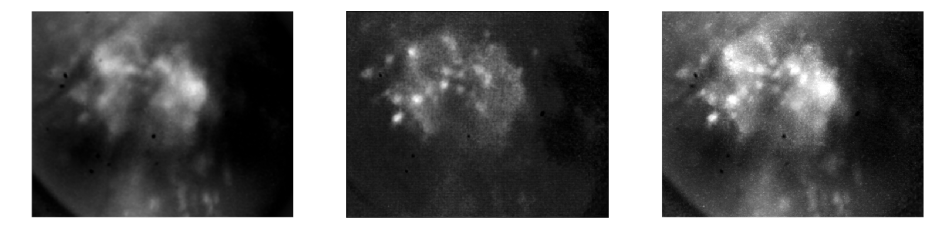

In [7]:
# look at the mean, std and Max projection images, and we will overlay these with our ROI masks

im = data.mean()

ax1 = plt.subplot(131)
im = data.mean()
image(im[:], ax=plt.gca())
plt.subplot(132)
img = data.stdev()
image(img[:], ax=plt.gca())
plt.subplot(133)
img = data.max()
image(img[:], ax=plt.gca())

In [9]:
def run(data):
    
    from thunder import SourceExtraction
    method = SourceExtraction('localmax')
    result = method.fit(data)
    
    return result

In [10]:
out = run(data)

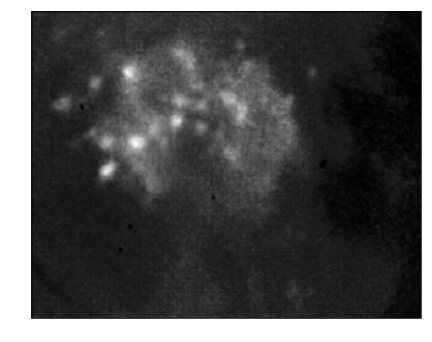

In [13]:
ref = data.stdev()
image(ref)

In [62]:
ref


array([[ 0.41971611,  0.39117914,  0.48809519, ...,  0.4872667 ,
         0.10942709,  0.49221674],
       [ 0.38778408,  0.591833  ,  1.00346507, ...,  0.49954984,
         0.4559574 ,  0.31920471],
       [ 0.49400446,  1.01601501,  2.11222338, ...,  0.91913642,
         0.52367284,  0.49422747],
       ..., 
       [ 0.44387475,  1.56483393,  3.67216717, ...,  2.78745715,
         1.80096903,  0.9111895 ],
       [ 0.52360269,  1.09869277,  2.6790621 , ...,  2.59140346,
         1.6173531 ,  0.94035142],
       [ 0.47974588,  0.65510638,  1.53137976, ...,  1.70678977,
         1.19318543,  0.65037956]])

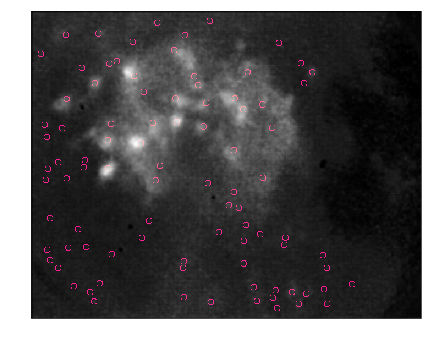

In [14]:
image(out.masks((560,710), base=ref, outline=True))

In [15]:
from thunder.extraction.feature.methods.localmax import LocalMaxFeatureAlgorithm
LocalMaxFeatureAlgorithm?

In [22]:
def run(data):
    
    from thunder import SourceExtraction
    method = SourceExtraction('localmax', maxSources=300, minDistance=11, radius=15)
    result = method.fit(data)
    
    return result

In [23]:
out = run(data)

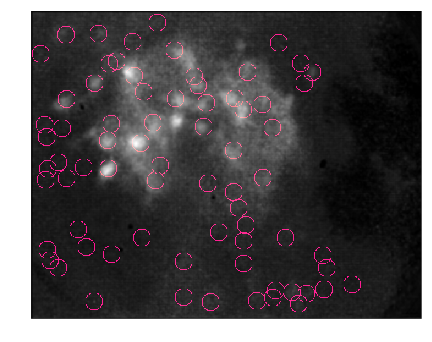

In [24]:
image(out.masks((560,710), base=ref, outline=True))

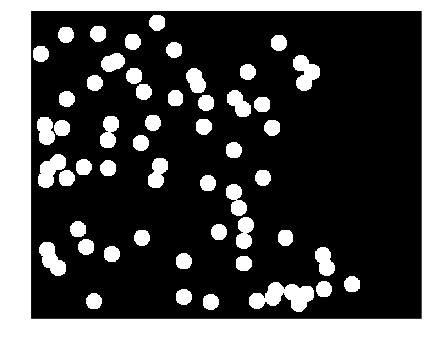

In [25]:
image(out.masks((560,710)))

In [20]:
# # Lets try another class:
# def run(data):

#     from thunder import SourceExtraction
#     from thunder.extraction import OverlapBlockMerger
#     #merger = OverlapBlockMerger(0.1)
#     method = SourceExtraction('nmf',  minArea=1000, maxArea=3000)
#     result = method.fit(data, size=(10, 10), padding=4)
    
#     return result 

In [26]:
# out = run(data)

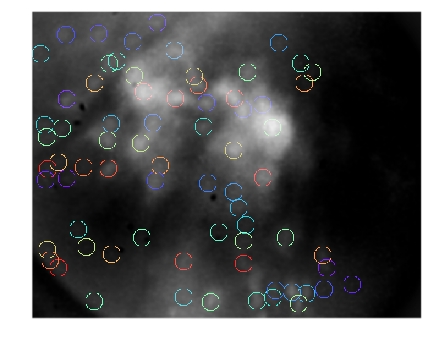

In [215]:
image(out.masks((560,710), base=ref, outline=True, color='random'))

In [220]:
out[1]


Source
center: [41.0, 122.0]
bbox: [27, 108, 55, 136]

In [27]:
output = data.meanByRegions(out.coordinates).toSeries()

In [28]:
plotData = output.toTimeSeries();


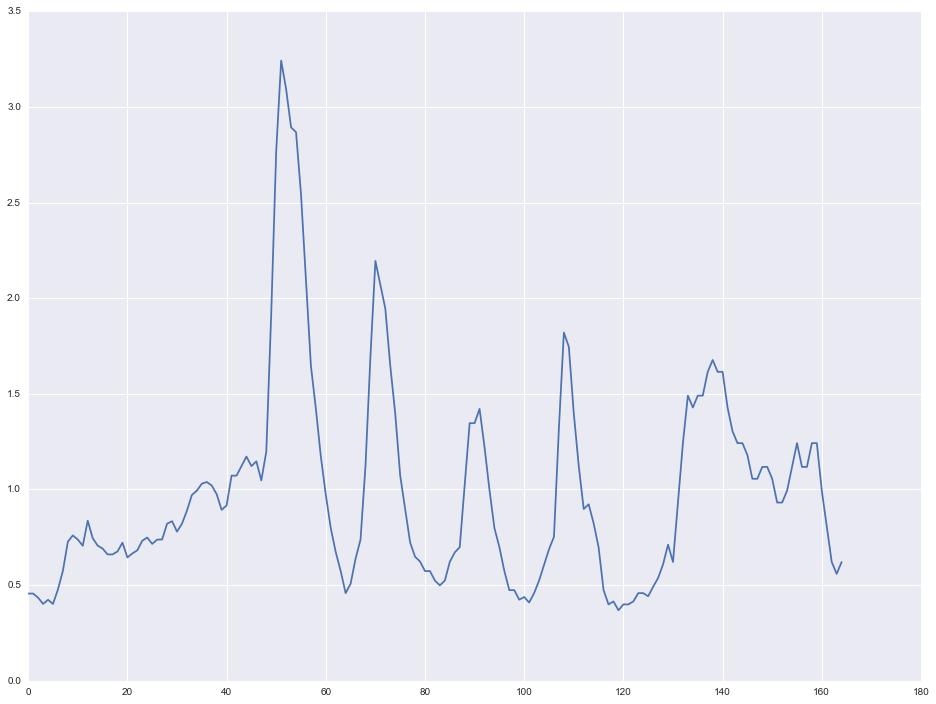

In [29]:
output.index.shape
plt.plot(plotData.normalize().max());


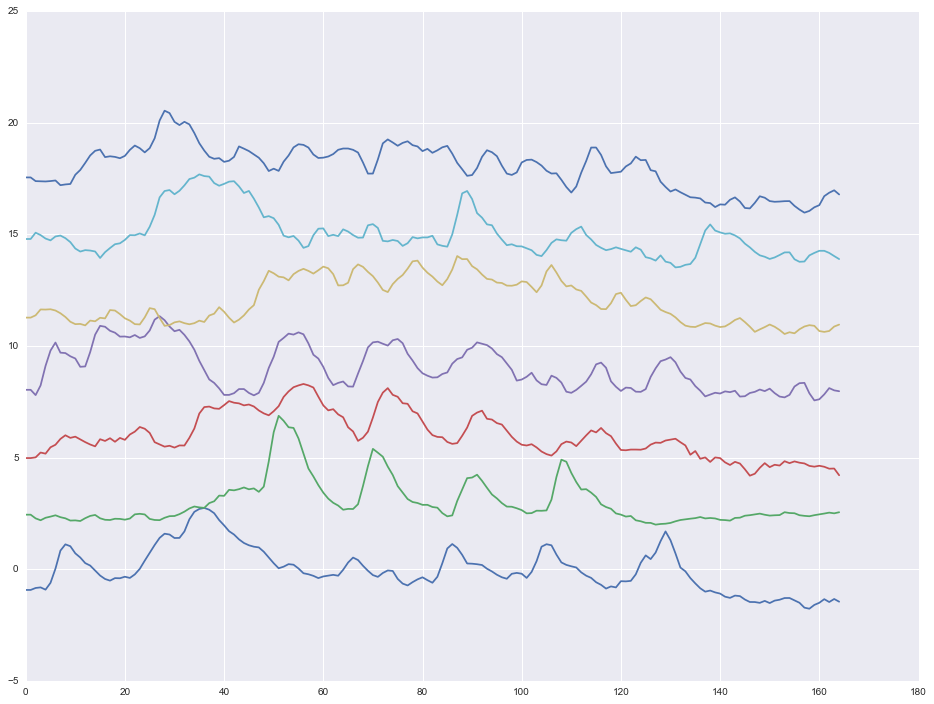

In [30]:
import numpy as np
from scipy import stats
sns.set_style('darkgrid')
lines = 7

examples = output.toTimeSeries().center(axis=1).subset(nsamples=lines, thresh=18)
mean = examples.mean(axis=1)

examples2 = examples - mean[:, np.newaxis]

examples4 = stats.zscore(examples2, axis=1)
examples5 = (examples4.T + np.arange(0,lines)*3).T
plt.plot(examples5.T); #  [0:20,:]);



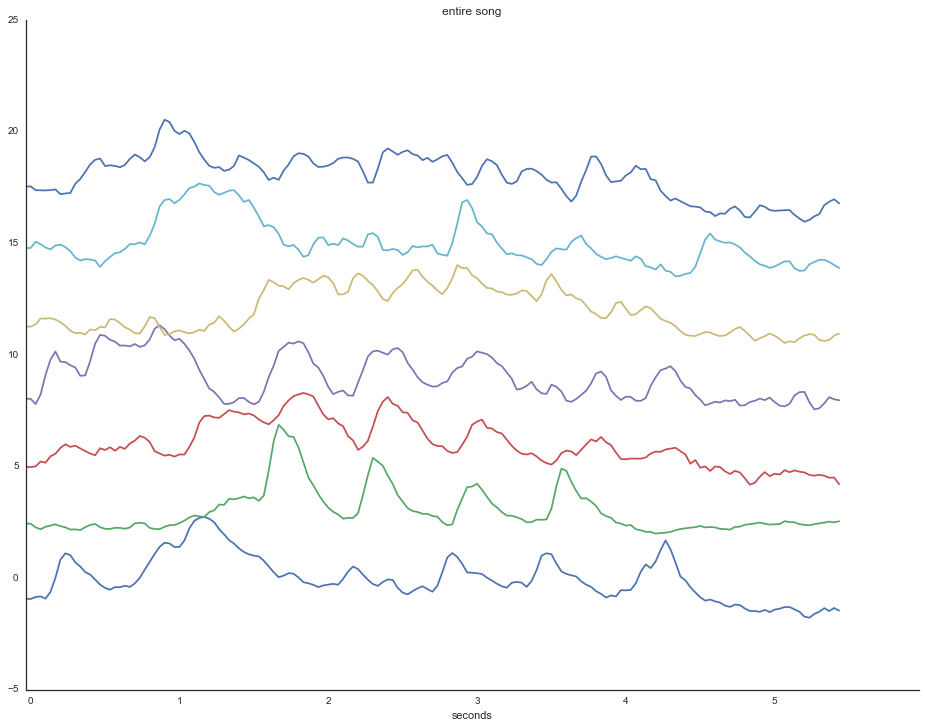

In [31]:
# Lets make a prettier picture of the data- despine and take out the darkgrid, and 
# add an appropriate time axis:

import seaborn as sns
sns.set_style("white")
plt.title('entire song')

plt.plot(examples5.T); #  [0:20,:]);
ticks = np.arange(1,examples5.shape[1],30) # Make tics every 30 steps, or once per second
labels = range(ticks.size)
plt.xticks(ticks, labels)
plt.xlabel('seconds')
sns.despine()